<a href="https://colab.research.google.com/github/GoCodeAfreen/FMML_PROJECT_AND_LABS/blob/main/AIML_Module_02_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [6]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

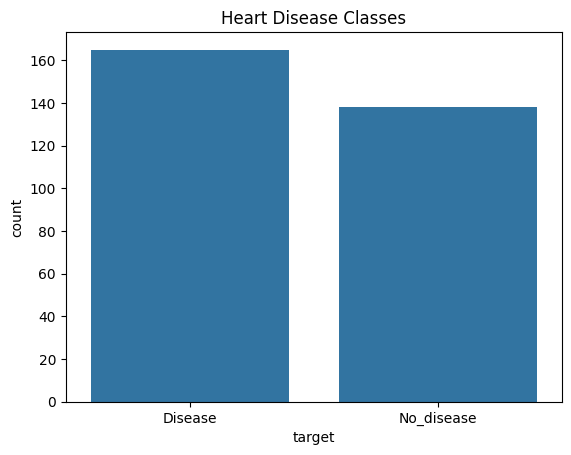

In [8]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

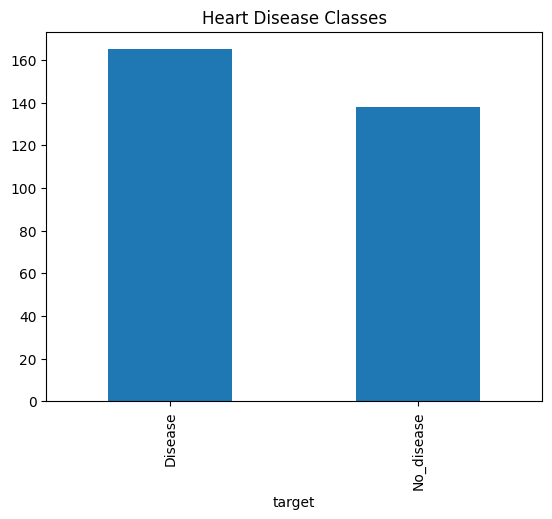

In [9]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

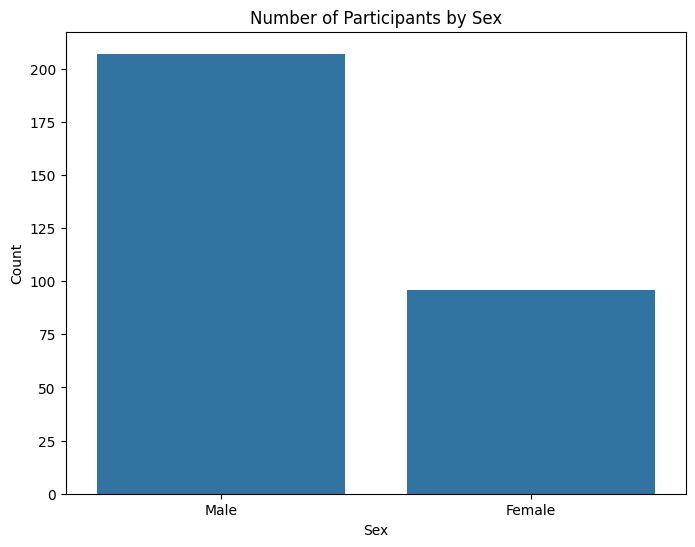

In [10]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you


# Count plot for the 'sex' column
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=data)
plt.title('Number of Participants by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


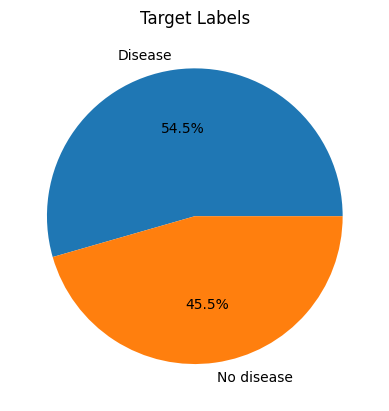

In [11]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

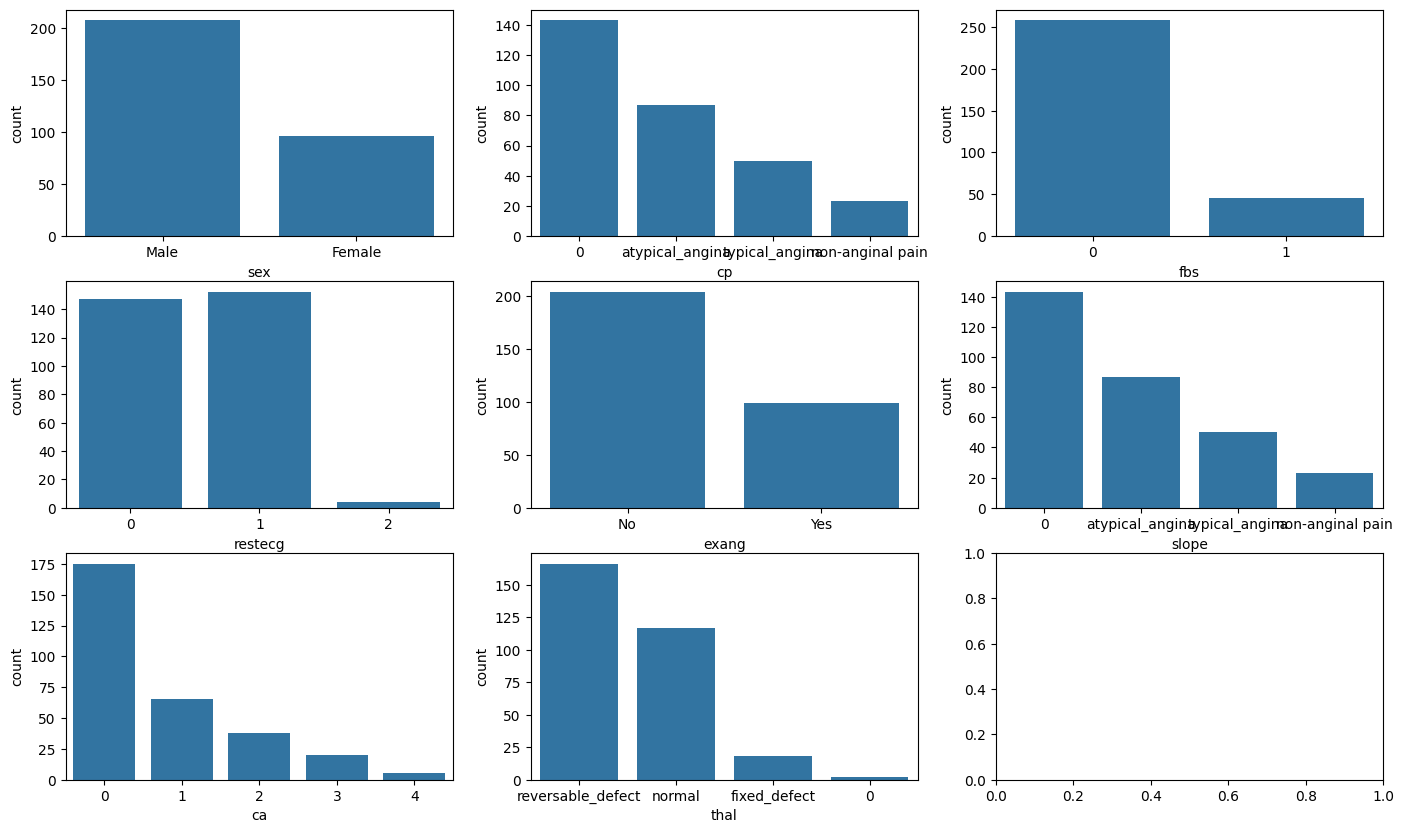

In [12]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

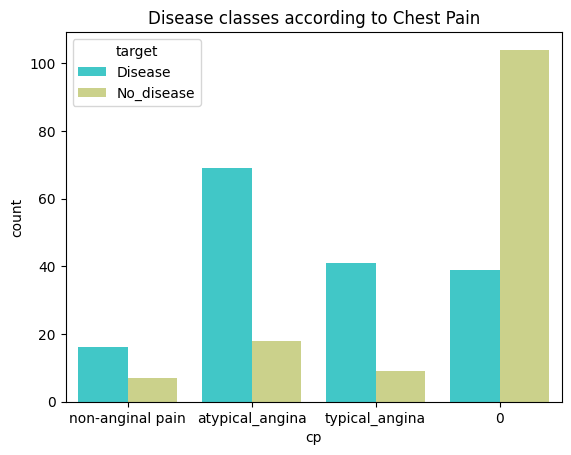

In [13]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

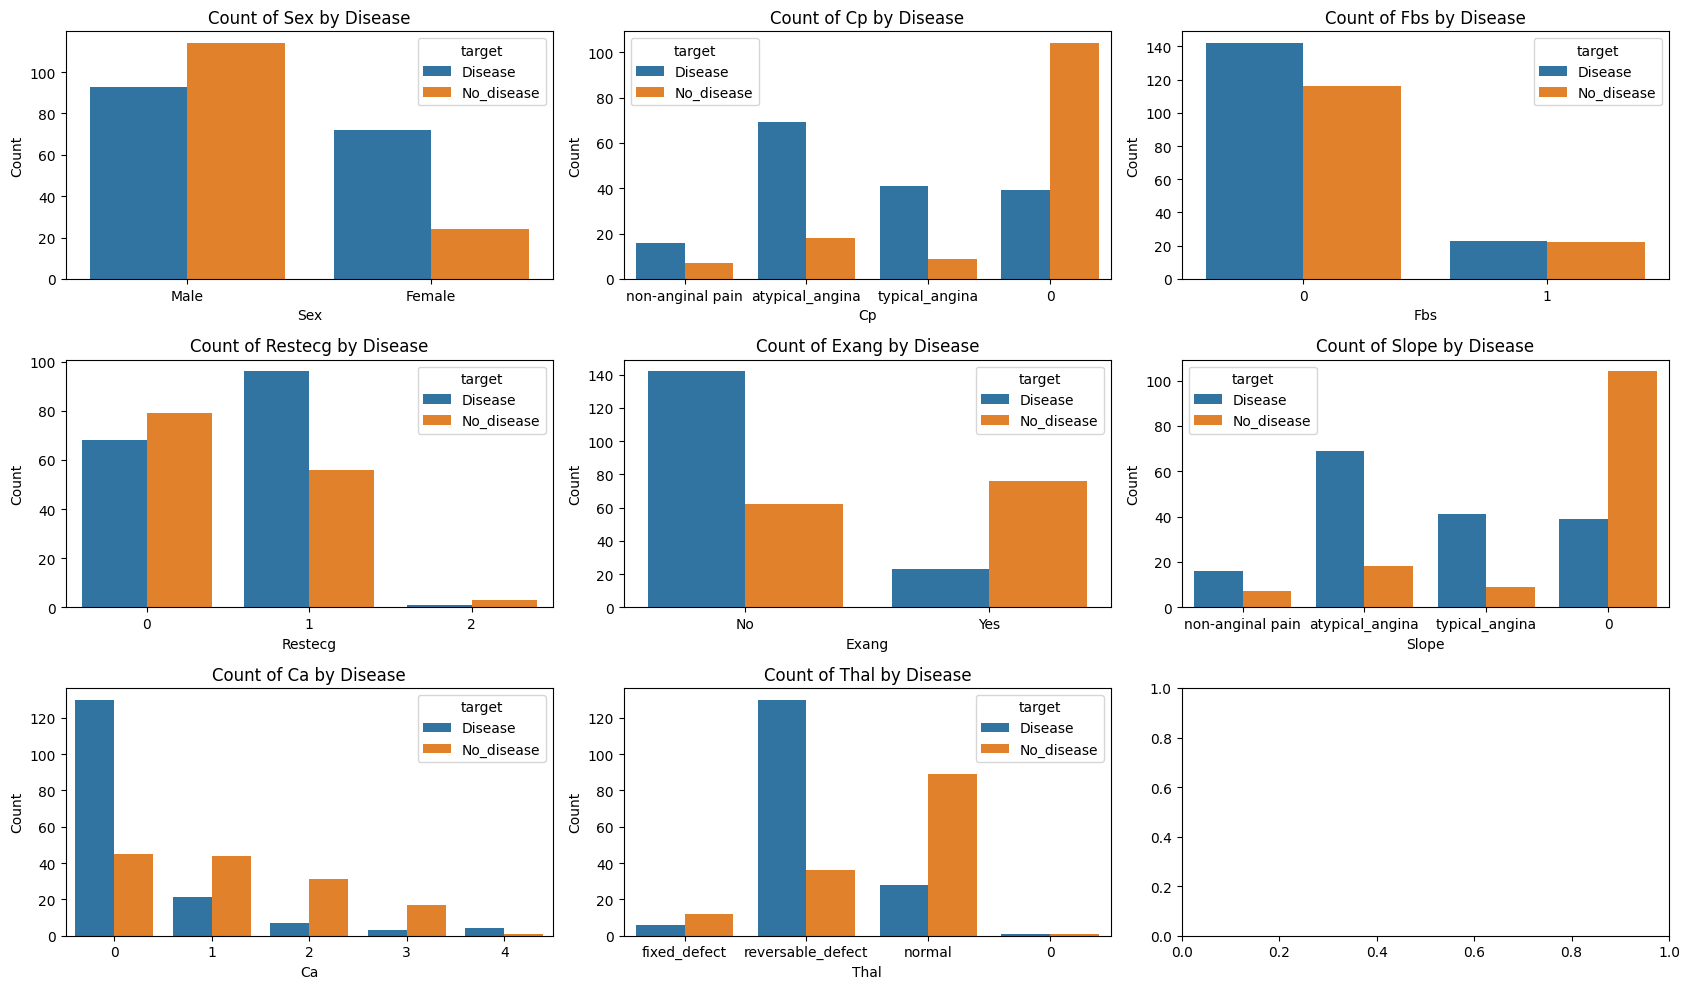

In [14]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:


# Create a subplot grid of 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))

# List of categorical features
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Iterate through the categorical features and plot count plots
for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.countplot(x=feature, hue='target', data=data, ax=ax)
    ax.set_title(f'Count of {feature.capitalize()} by Disease')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


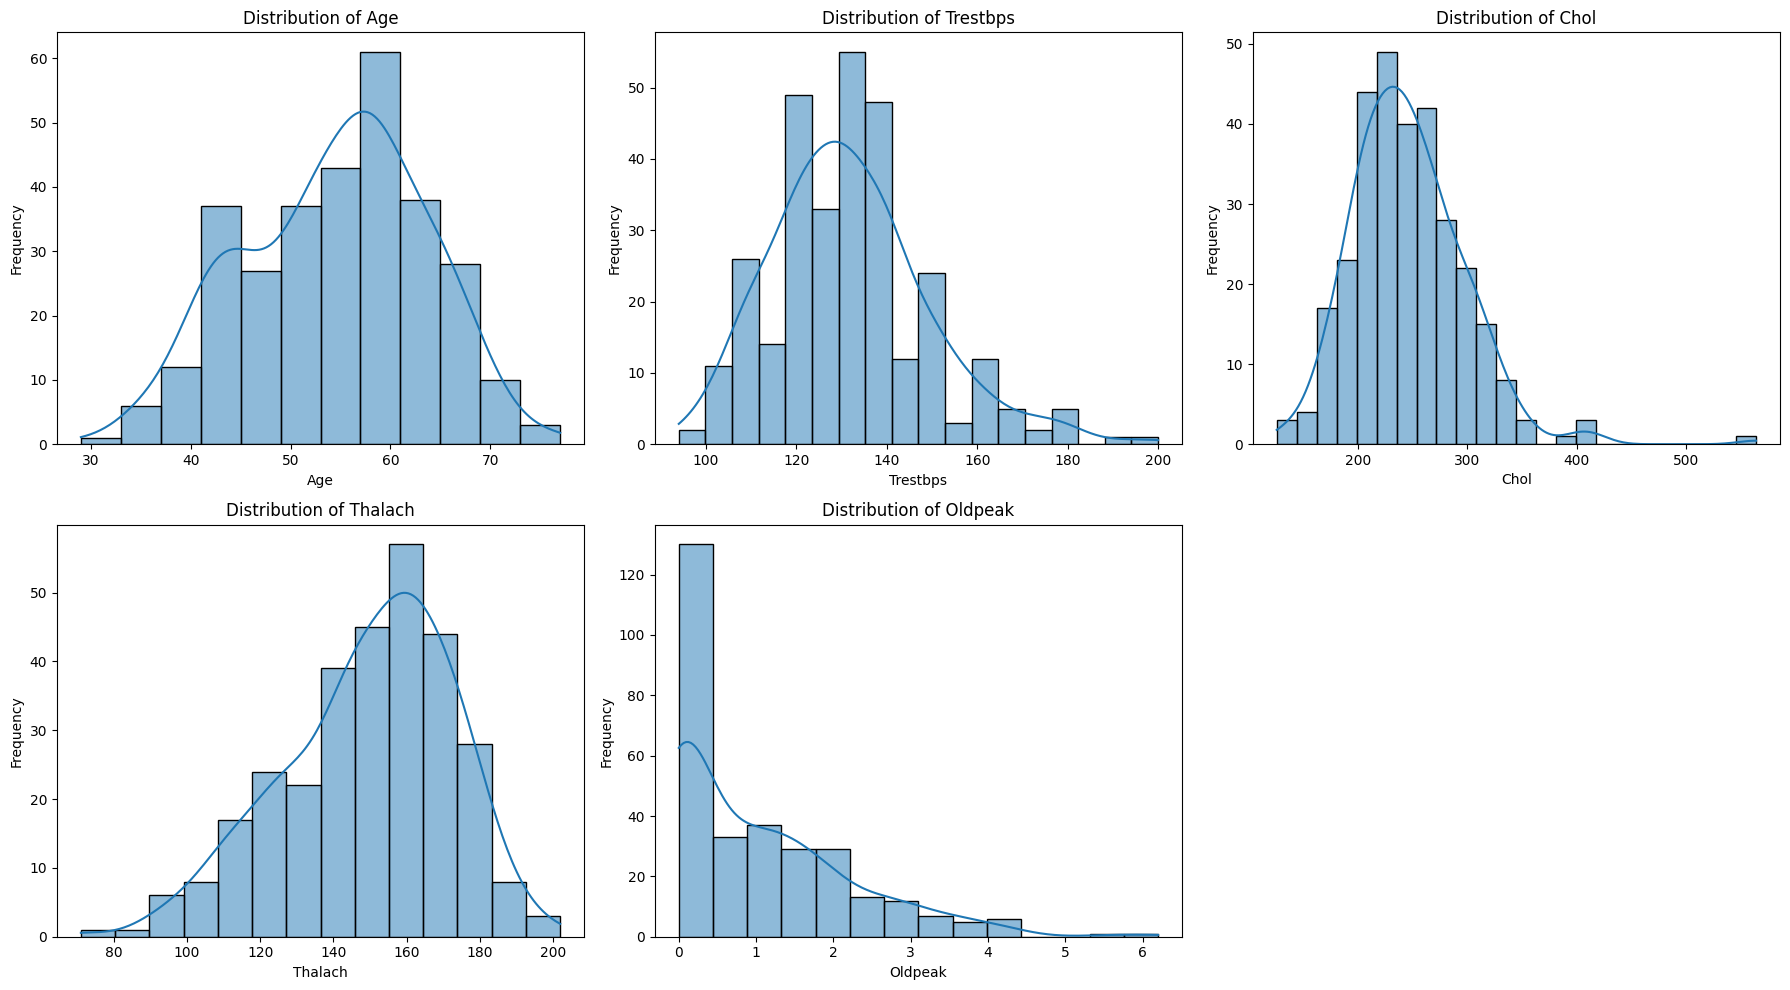

In [15]:
# Visualising the distribution of the continous variables


# List of continuous features
cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a subplot grid of 2x3 for the histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Iterate through the continuous features and plot histograms
for idx, feature in enumerate(cont_feat):
    ax = axes[int(idx/3), idx%3]
    sns.histplot(data=data, x=feature, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature.capitalize()}')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Frequency')

# Remove the empty subplot (since we have 5 continuous variables)
fig.delaxes(axes[1,2])

# Adjust layout
plt.tight_layout()
plt.show()


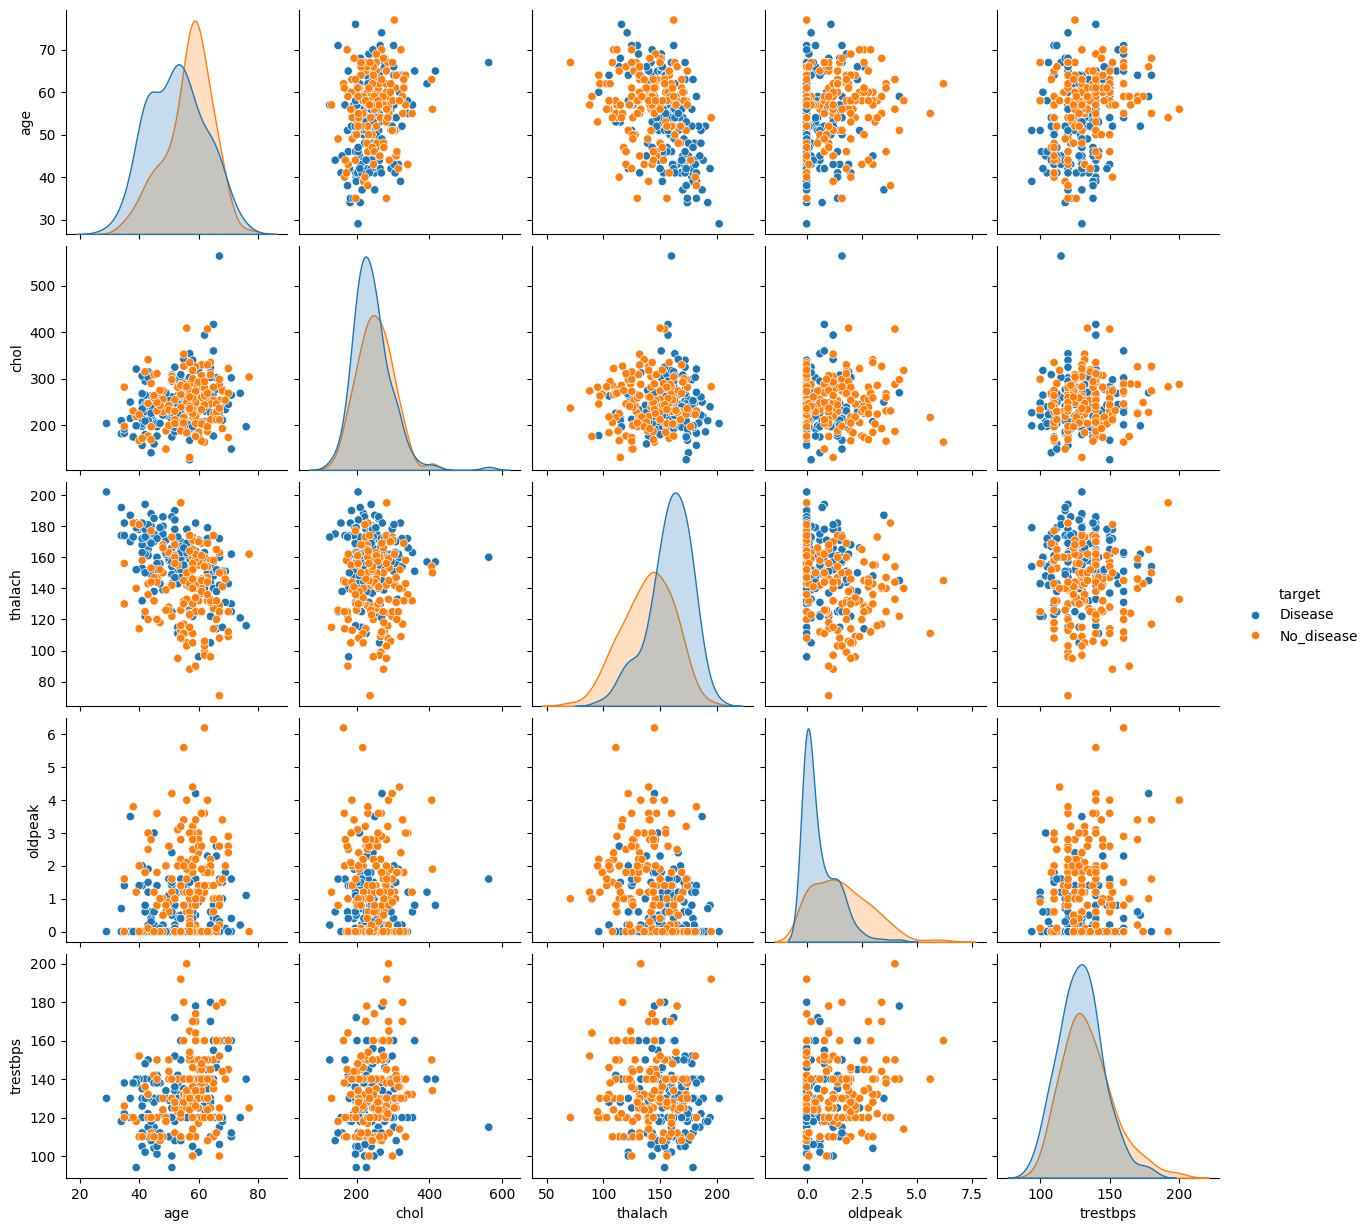

In [16]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

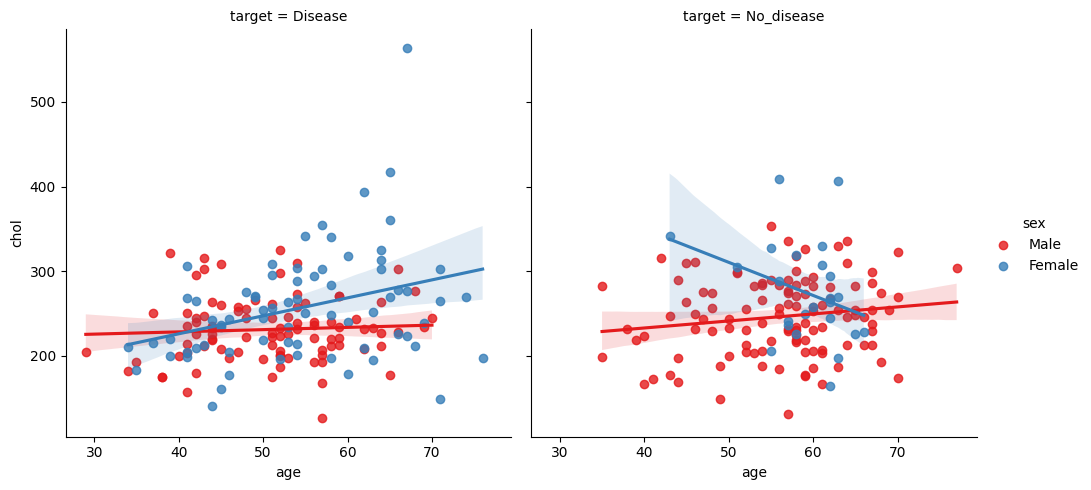

In [17]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

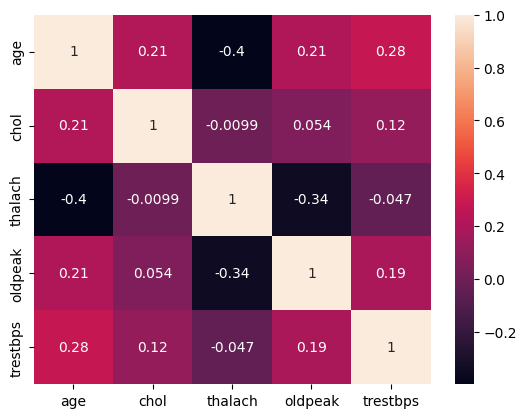

In [18]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

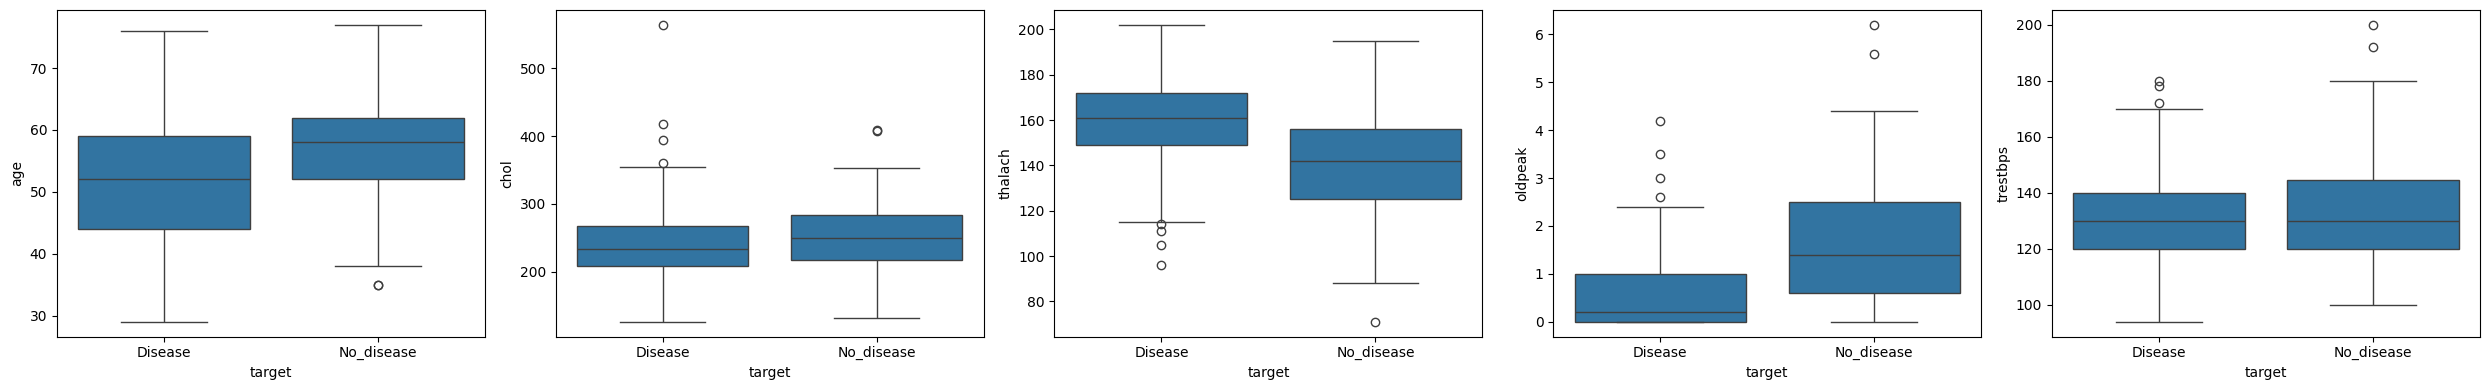

In [19]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

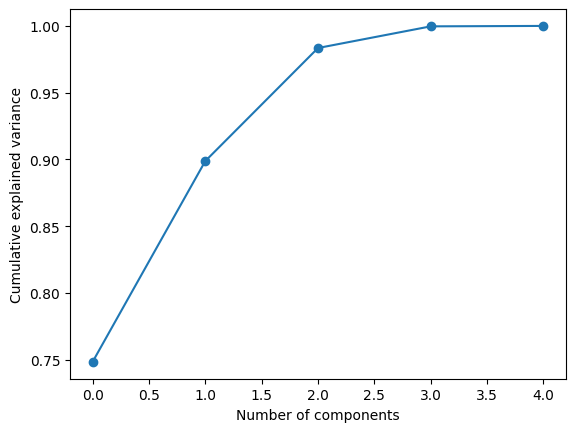

In [20]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components

import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


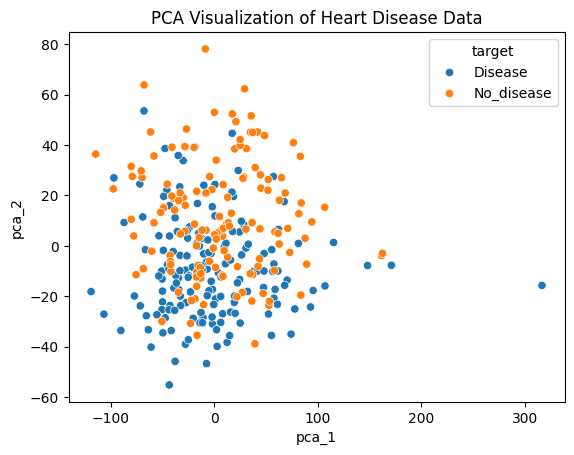

In [21]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


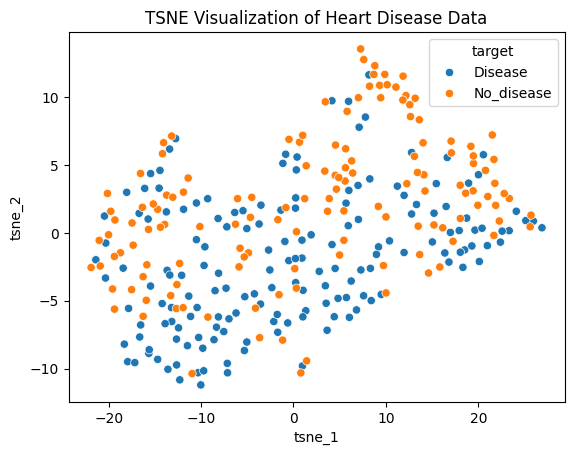

In [22]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

### ANSWERS :
01. ANS

Percentage of Samples with Disease:

The percentage of samples with disease is approximately 54.46%. This was calculated by dividing the number of samples with disease by the total number of samples and multiplying by 100.
02. ANS

Three Continuous Features Showing Significant Statistical Difference:

The three continuous features that show a significant statistical difference in distribution with respect to the presence and absence of the disease are:

01. thalach (maximum heart rate achieved)

02. oldpeak (ST depression induced by exercise relative to rest)

03. age

These features have clear differences in their distributions when comparing individuals with and without heart disease.
03. ANS

Separation in Terms of Presence/Absence of Disease in PCA and t-SNE Plots:
The PCA and t-SNE plots do show some separation between the presence and absence of disease, but it is not completely distinct. There is some overlap, indicating that while the features do provide some differentiation, there are likely complex relationships and overlaps in the feature space that prevent clear-cut separation.

04. ANS

Optimal Number of Principal Components:

The optimal number of principal components can be determined by looking at the explained variance ratio. In this case, it appears that the first 3-4 principal components capture most of the variance in the data, suggesting that these components are sufficient for capturing the essential structure of the dataset.

05. ANS

Continuous Features with the Highest Correlation:

The continuous features with the highest correlation with each other are trestbps (resting blood pressure) and chol (serum cholesterol). This high correlation suggests that individuals with higher resting blood pressure also tend to have higher cholesterol levels, which can be important for understanding the relationships between these health indicators


----> Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [23]:
# Calculate the percentage of samples with disease
disease_count = data[data['target'] == 'Disease'].shape[0]
total_count = data.shape[0]
disease_percentage = (disease_count / total_count) * 100

print(f"The percentage of samples with disease is {disease_percentage:.2f}%")


The percentage of samples with disease is 54.46%


In [24]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [117]:
data = pd.read_csv("star_nutri_expanded.csv")

In [118]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


cleaning and filling the missing values in the data

In [119]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [120]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [121]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [123]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [124]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [125]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [126]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [127]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [128]:

data = data.replace({True: 1, False: 0})


In [129]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-129-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [130]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

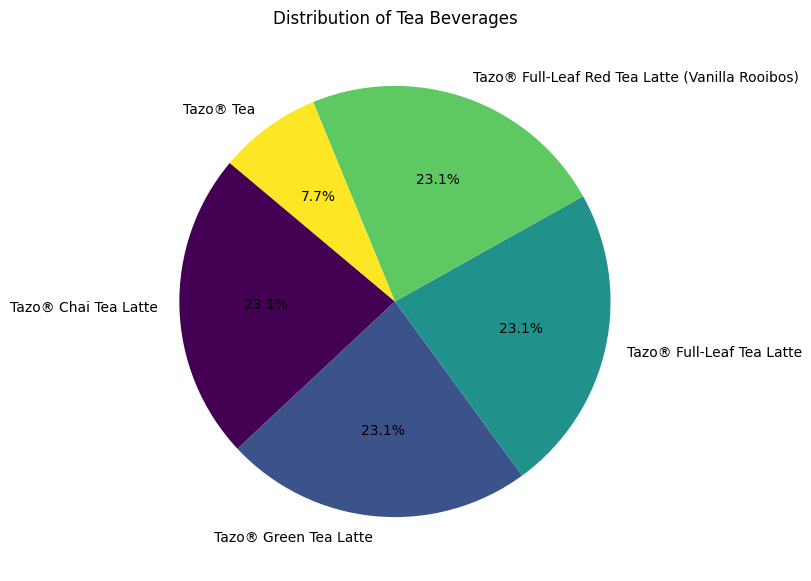

In [93]:
#Create a pie chart of the 'Tea' column also write your observation form the plot



# Filter the data for 'Tea' beverages
tea_data = data[data['Beverage_category'].str.contains('Tea', case=False, na=False)]

# Count the occurrences of each tea type
tea_counts = tea_data['Beverage'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 7))
tea_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Distribution of Tea Beverages')
plt.ylabel('')  # Hide the y-label
plt.show()



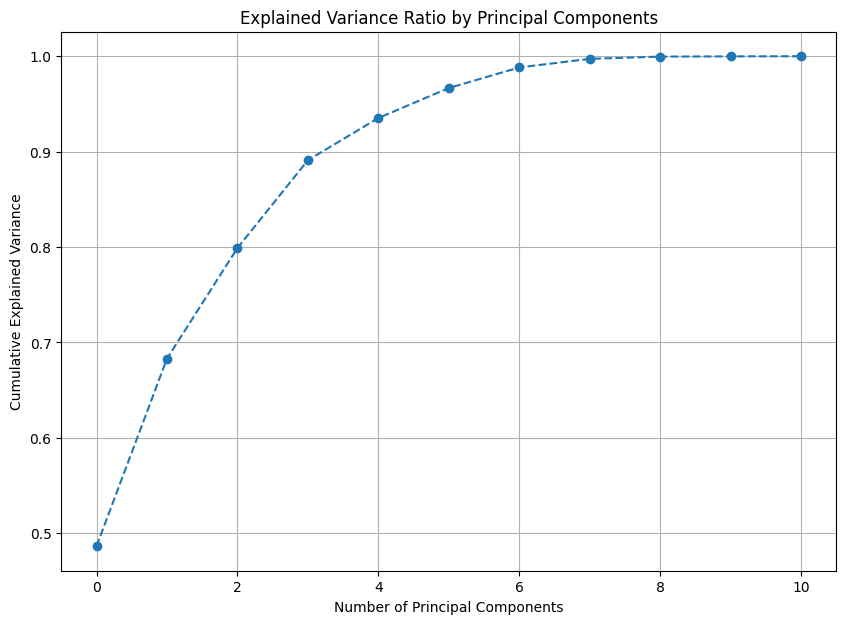

Optimal number of principal components: 6


In [132]:

# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?
from sklearn.preprocessing import StandardScaler


# Select numerical columns for PCA
numerical_cols = [
    'Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
    'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
    'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'
]

numerical_data = data[numerical_cols].fillna(0)  # Fill any missing values with 0

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()

# Optimal number of principal components
optimal_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Optimal number of principal components: {optimal_components}")


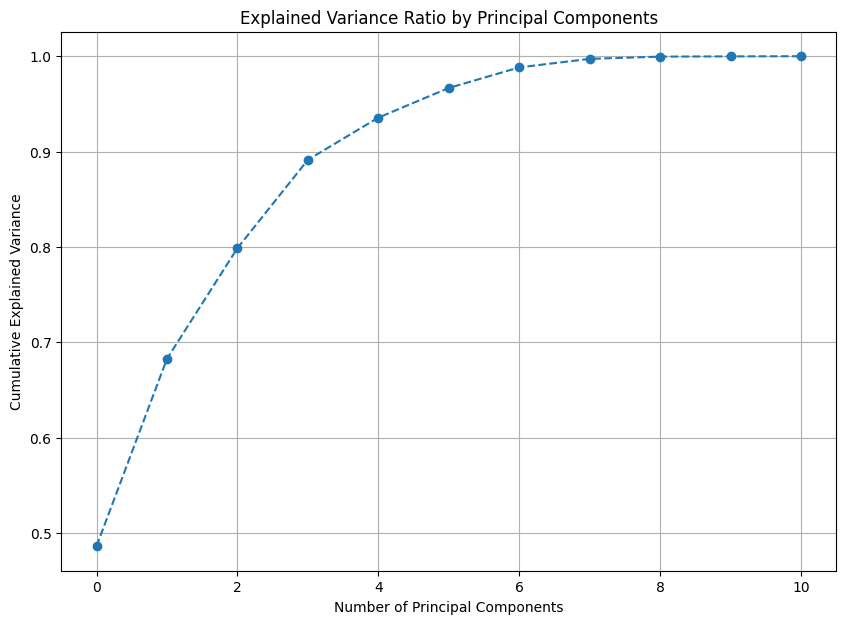

Optimal number of principal components: 6


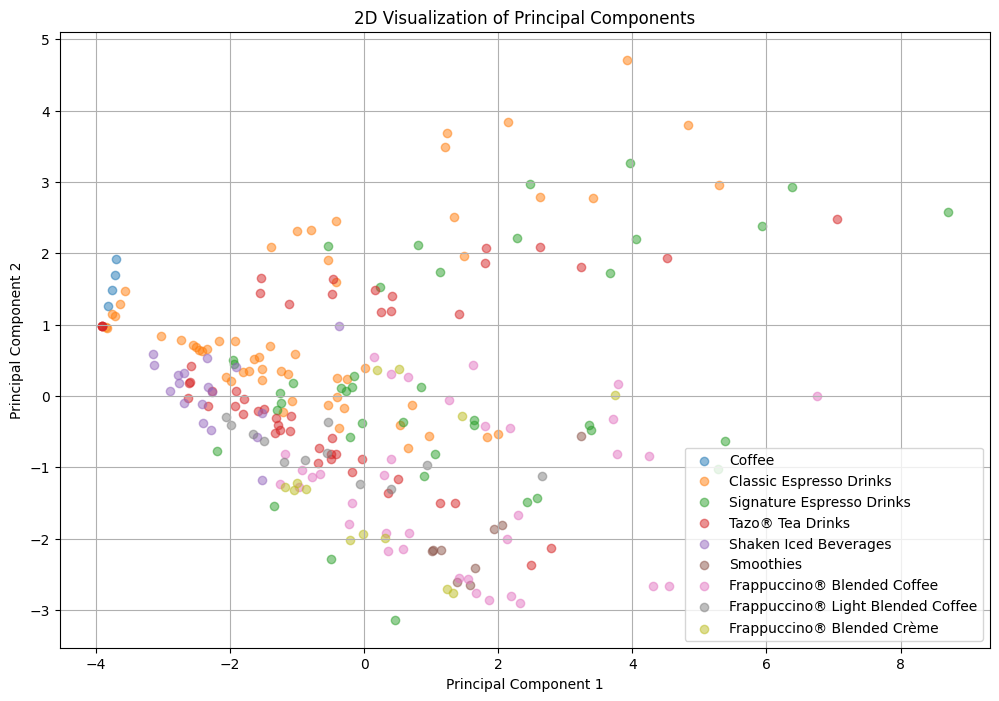

In [113]:

# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Select numerical columns for PCA
numerical_cols = [
    'Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
    'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
    'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'
]

# Convert all numerical columns to numeric values, forcing errors to NaN
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill NaN values with the median of each column
numerical_data = data[numerical_cols].fillna(data[numerical_cols].median())

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()

# Optimal number of principal components
optimal_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Optimal number of principal components: {optimal_components}")

# Perform PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
principal_components = pca_optimal.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(optimal_components)])

# Add the Beverage category to the PCA DataFrame for visualization purposes
pca_df['Beverage_category'] = data['Beverage_category']

# Plot the first two principal components
plt.figure(figsize=(12, 8))
for category in pca_df['Beverage_category'].unique():
    category_data = pca_df[pca_df['Beverage_category'] == category]
    plt.scatter(category_data['Principal Component 1'], category_data['Principal Component 2'], label=category, alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()




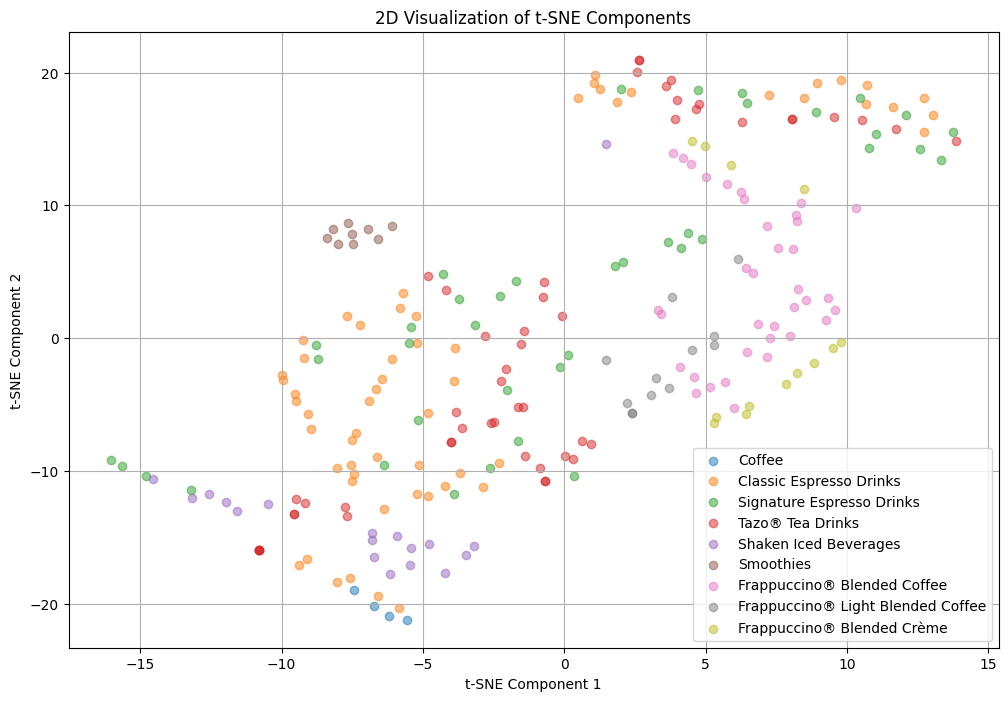

In [114]:

 #plot the first 2 components of tsne, whats you observation from the plot?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


# Select numerical columns for t-SNE
numerical_cols = [
    'Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
    'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
    'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'
]

numerical_data = data[numerical_cols].fillna(0)  # Fill any missing values with 0

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_data)

# Create a DataFrame with the t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Add the Beverage category to the t-SNE DataFrame for visualization purposes
tsne_df['Beverage_category'] = data['Beverage_category']

# Plot the first two t-SNE components
plt.figure(figsize=(12, 8))
for category in tsne_df['Beverage_category'].unique():
    category_data = tsne_df[tsne_df['Beverage_category'] == category]
    plt.scatter(category_data['t-SNE Component 1'], category_data['t-SNE Component 2'], label=category, alpha=0.5)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D Visualization of t-SNE Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()


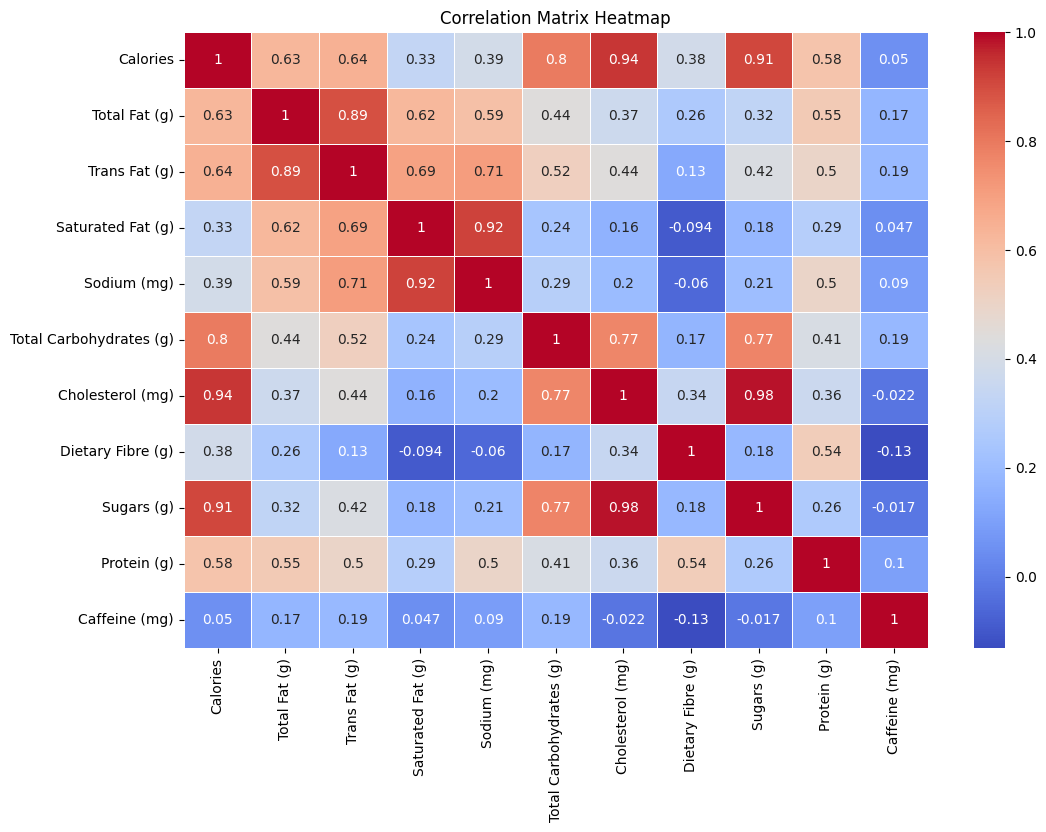

In [115]:
#create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Select numerical columns for the correlation matrix
numerical_cols = [
    'Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
    'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
    'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'
]

numerical_data = data[numerical_cols].fillna(0)  # Fill any missing values with 0

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



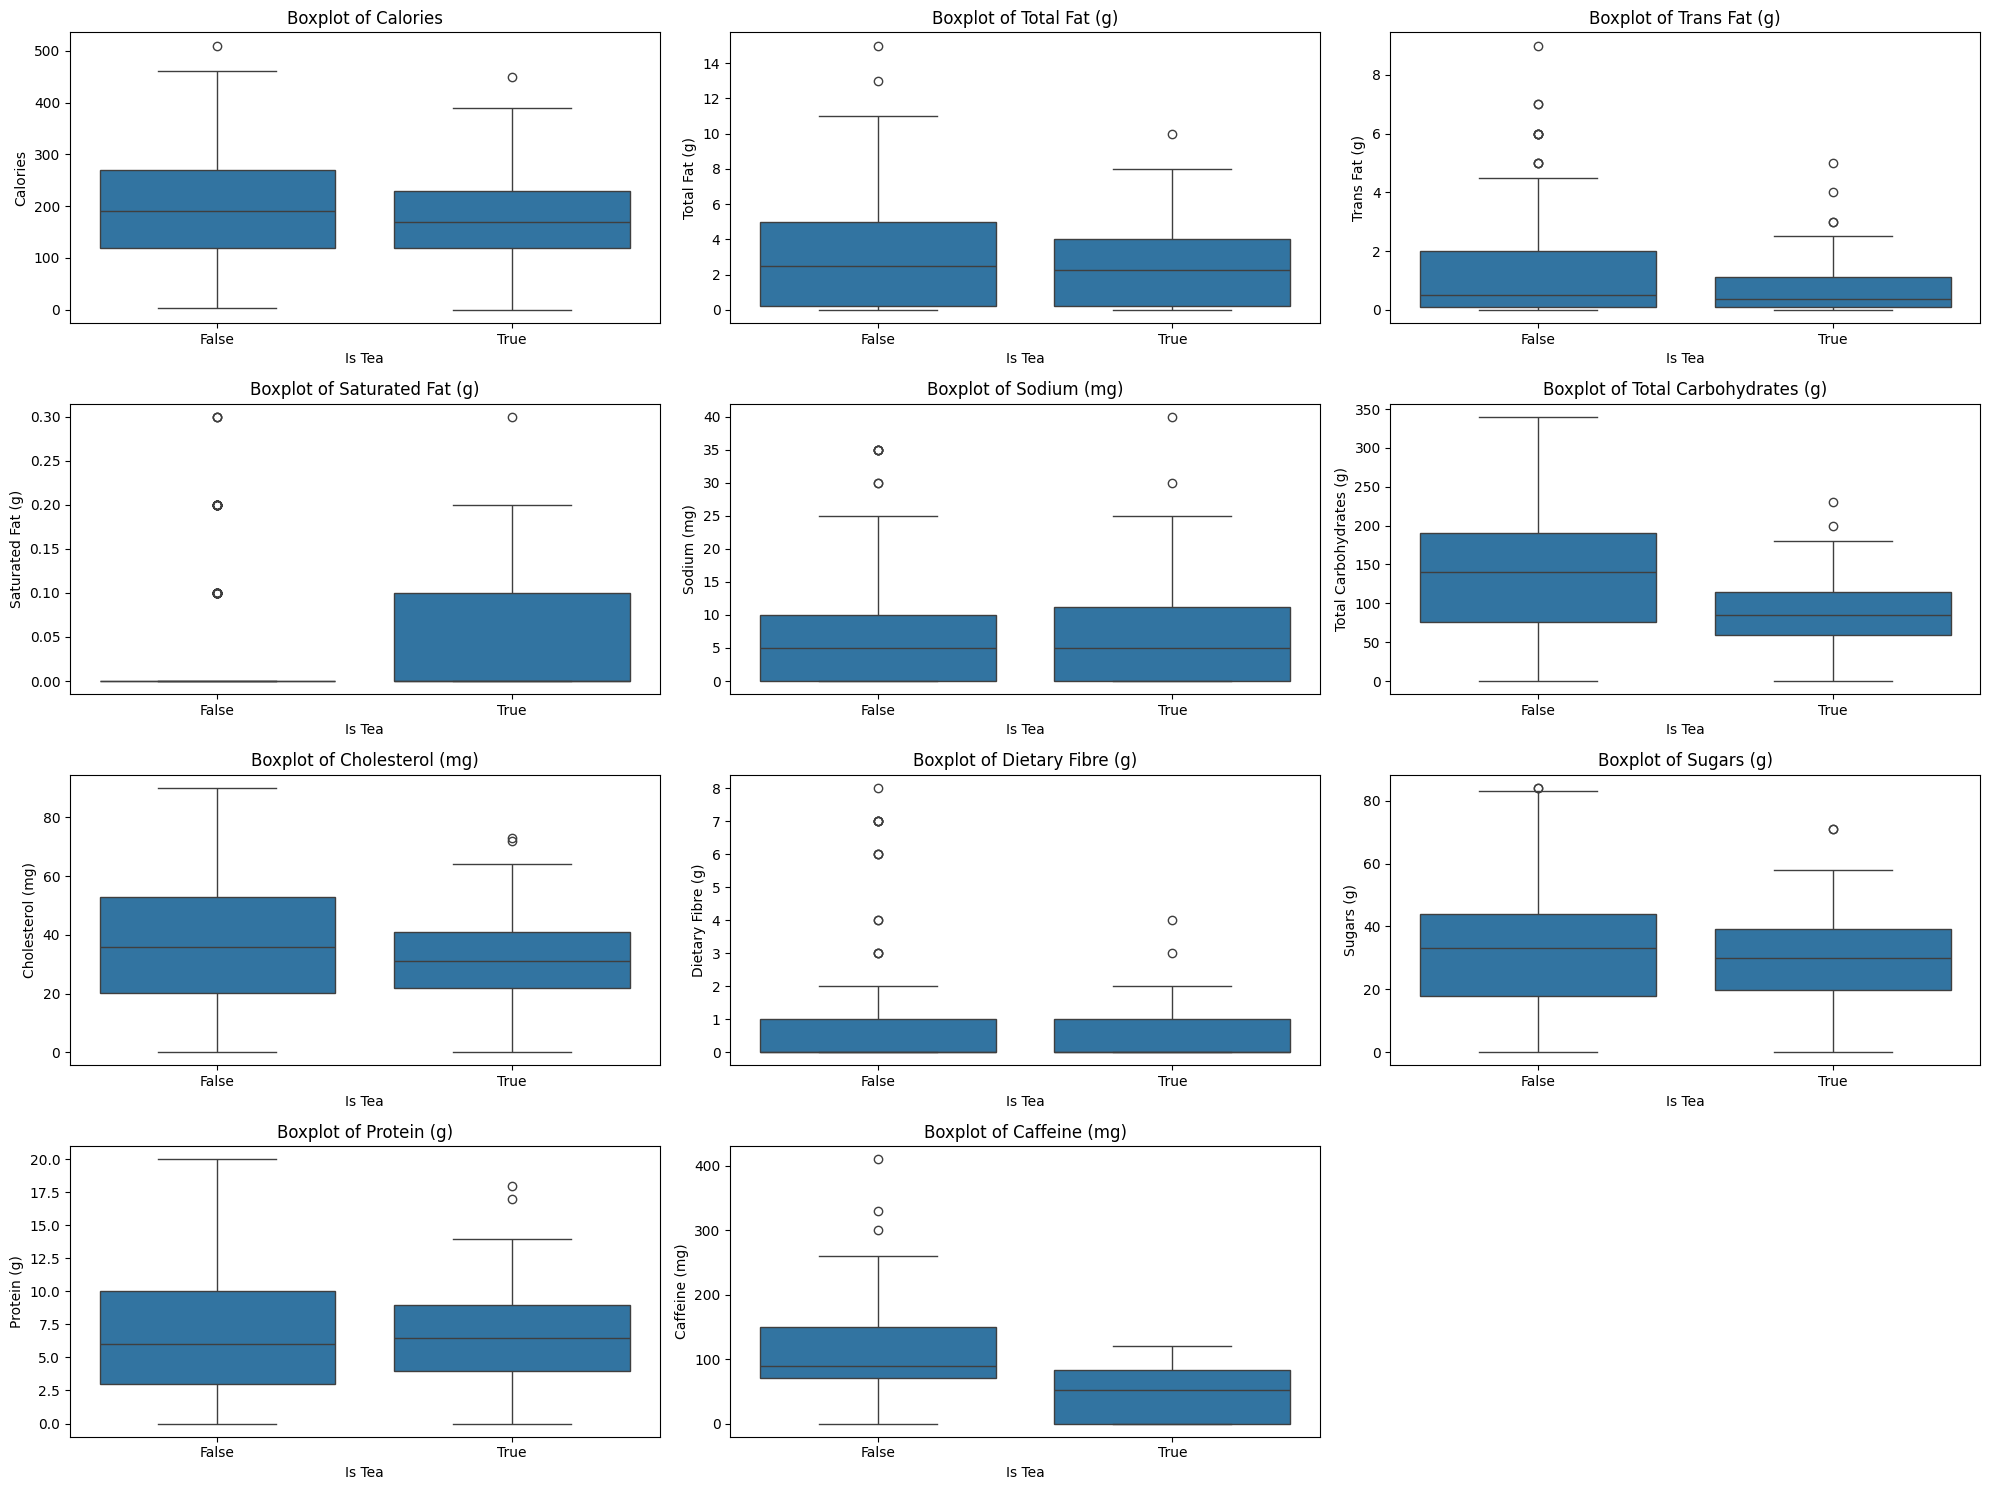

In [116]:

# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select numerical columns
numerical_cols = [
    'Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
    'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
    'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'
]

# Create a new column to identify tea beverages
data['Is_Tea'] = data['Beverage_category'].str.contains('Tea', case=False, na=False)

# Create boxplots for each numeric column
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Is_Tea', y=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Is Tea')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.